# Init

In [17]:
import os; import pandas as pd; import numpy  as np
from pandas.tseries.offsets import *
import statsmodels.formula.api as smf

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


# Demographics

In [18]:
def read_quarterly_data(file_name):
    path = "../data/city_of_lugano/demographics/"
    dfs = []
    for year in np.arange(2008, 2019):
        for quarter in np.arange(1, 5):
            df = pd.read_json(path+"{0}/{1}/".format(year, quarter)+file_name+'.json')
            df['year'] = year
            df['quarter'] = quarter
            df['yq'] = pd.datetime(year,quarter*3-2,1)
            dfs.append(df)

    df = pd.concat(dfs)
    return df

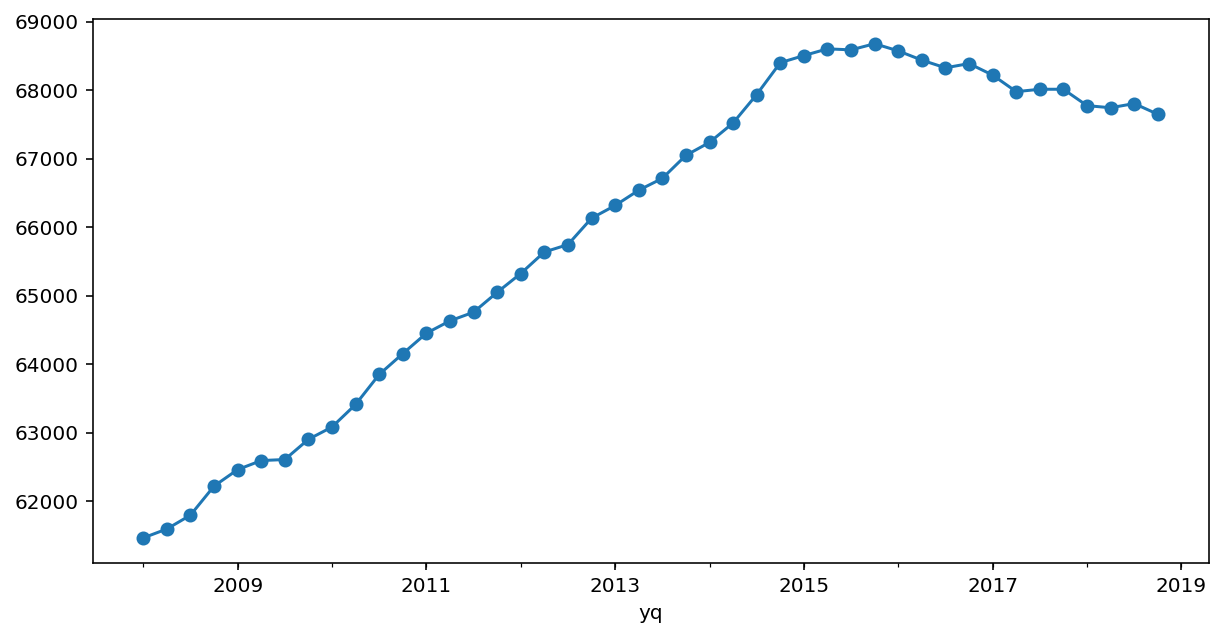

In [29]:
df = read_quarterly_data('q_quartieri')
df.rename({'Quartierenome':'nei'}, axis=1, inplace=True)
df = df.set_index(['nei','yq'])

fig, ax1 = plt.subplots(1,1, figsize=(10,5))
df.groupby(['yq'])['TotaleAbitantiCurr'].sum().plot(ax=ax1, marker='o');

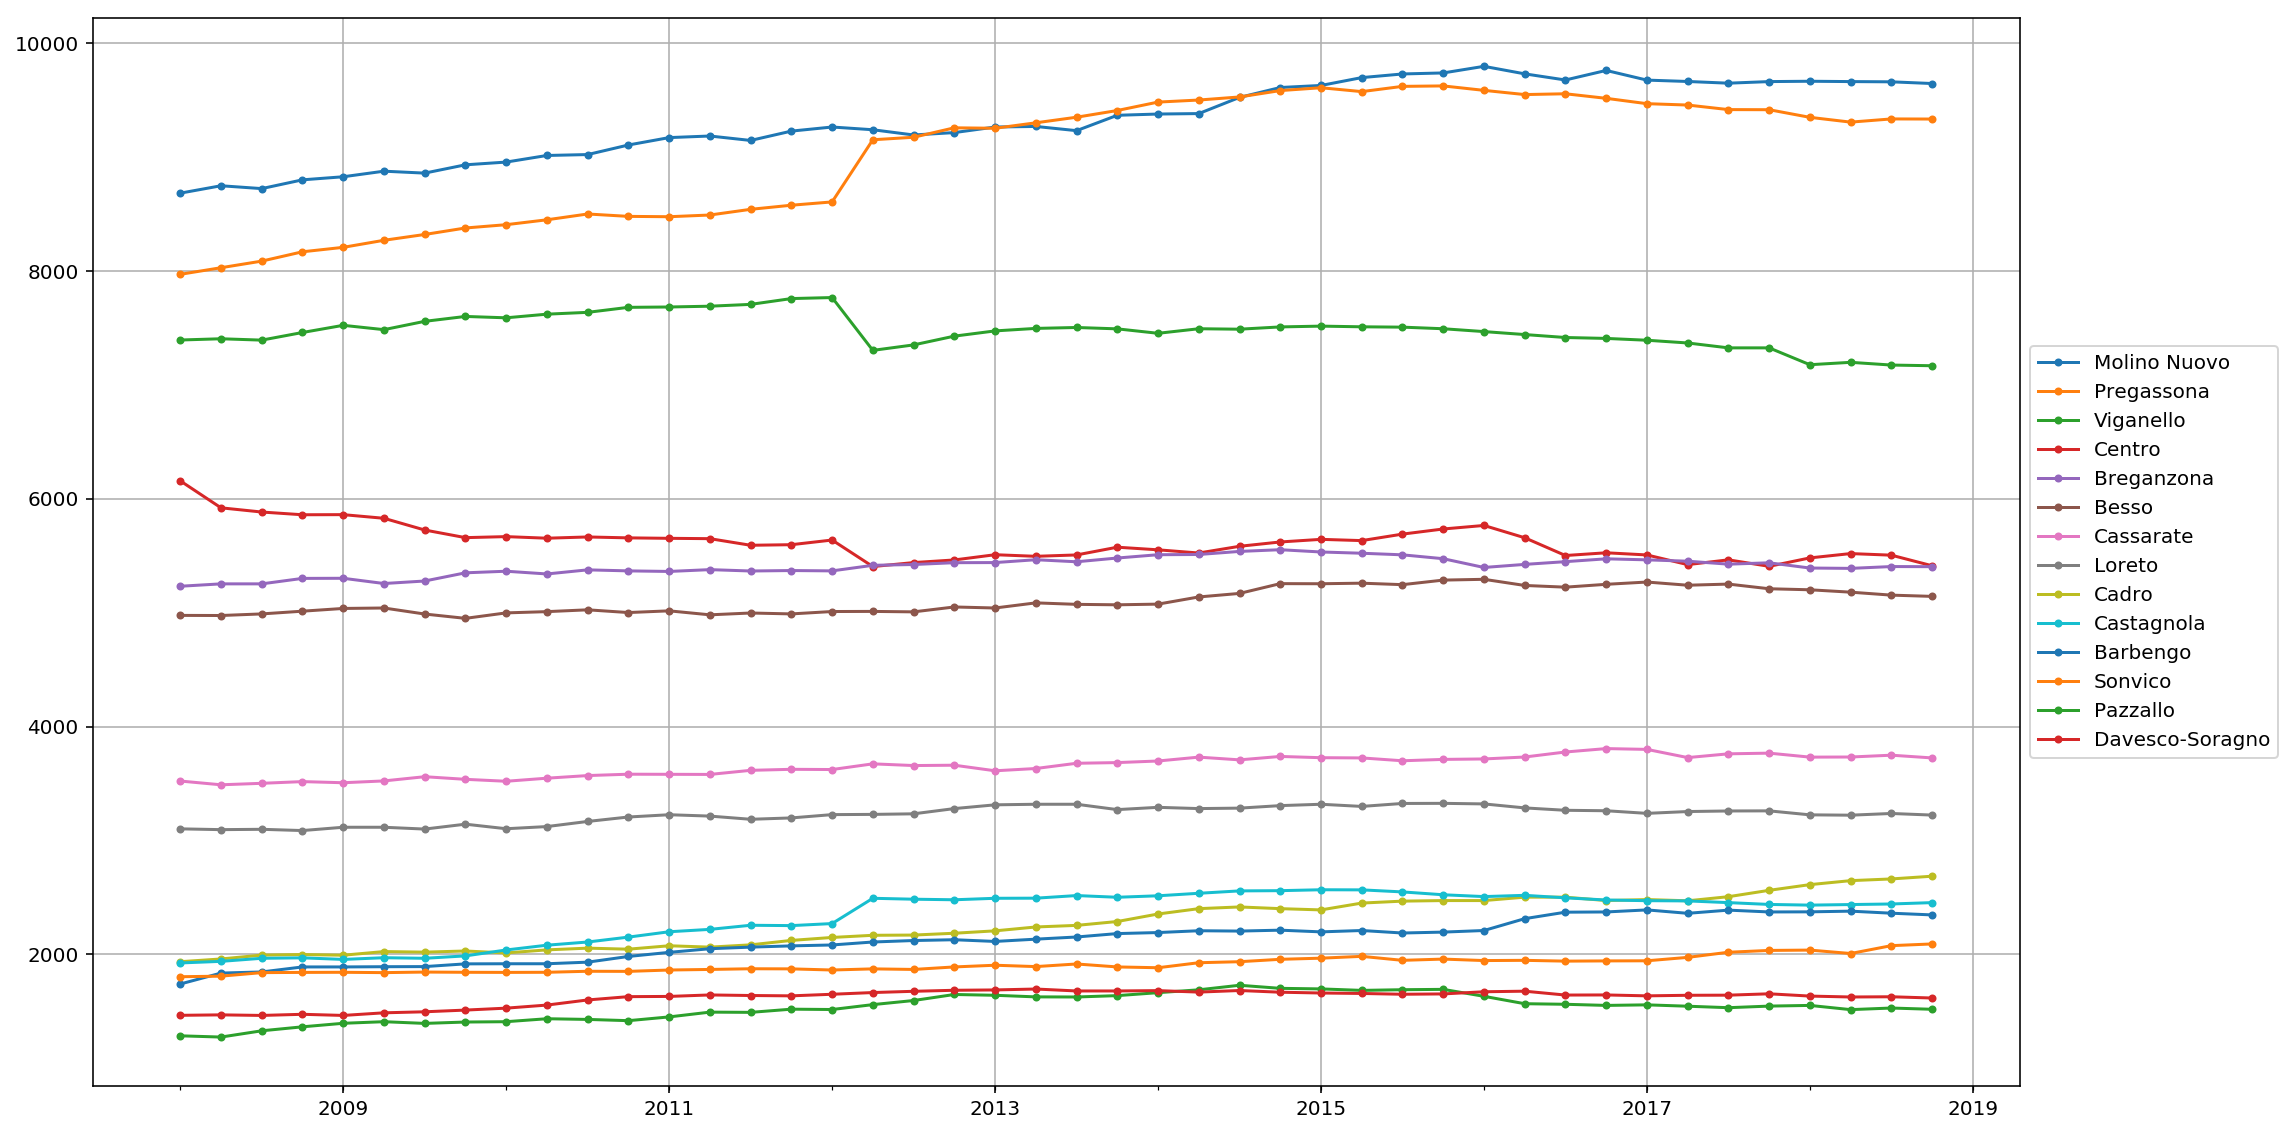

In [21]:
neis = df.groupby(['nei'])['TotaleAbitantiCurr'].max().sort_values()
big_neis = neis[neis > 1000].index[::-1]

fig, ax1 = plt.subplots(1,1, figsize=(16,8))
neis = df.index.get_level_values(0).unique()
for nei in big_neis:
    df.xs(nei)['TotaleAbitantiCurr'].plot(ax=ax1, marker='.', label=nei);
    ax1.set_title("")
    ax1.xaxis.set_label_text("");
    ax1.yaxis.set_label_text("");
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.grid()
    plt.tight_layout();

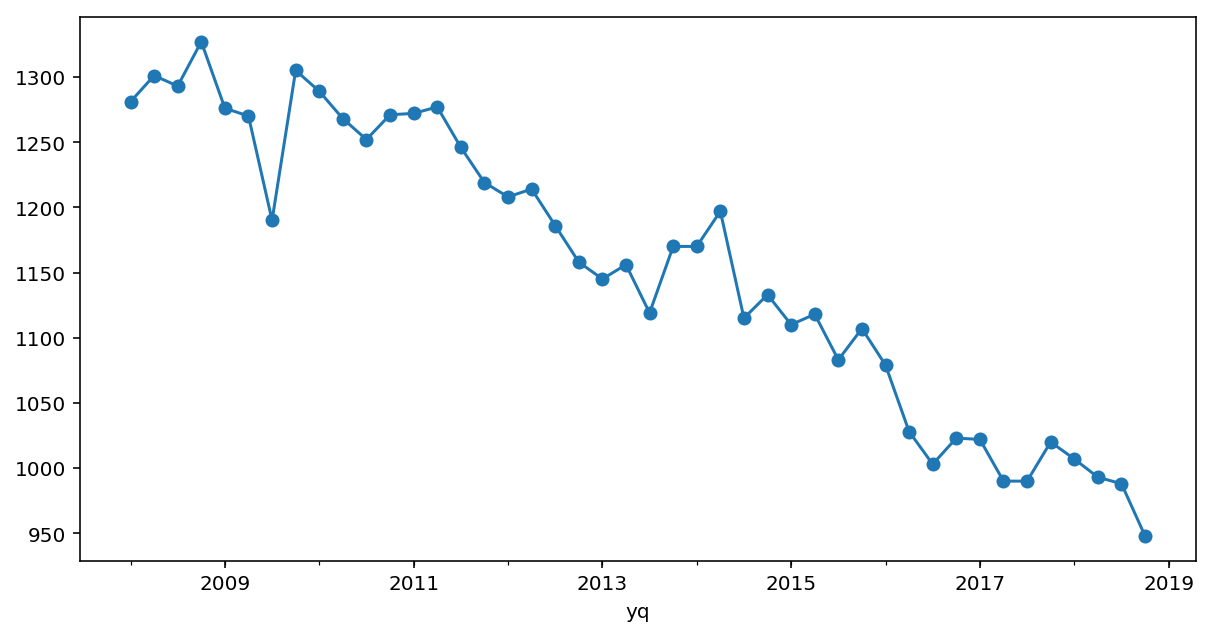

In [31]:
# Temporary Residents
df = read_quarterly_data('q_pop_soggiornanti')
df.rename({'Cittadinanza':'type'}, axis=1, inplace=True)
df = df.set_index(['type','yq'])

fig, ax1 = plt.subplots(1,1, figsize=(10,5))
df.groupby(['yq'])['measure'].sum().plot(ax=ax1, marker='o');

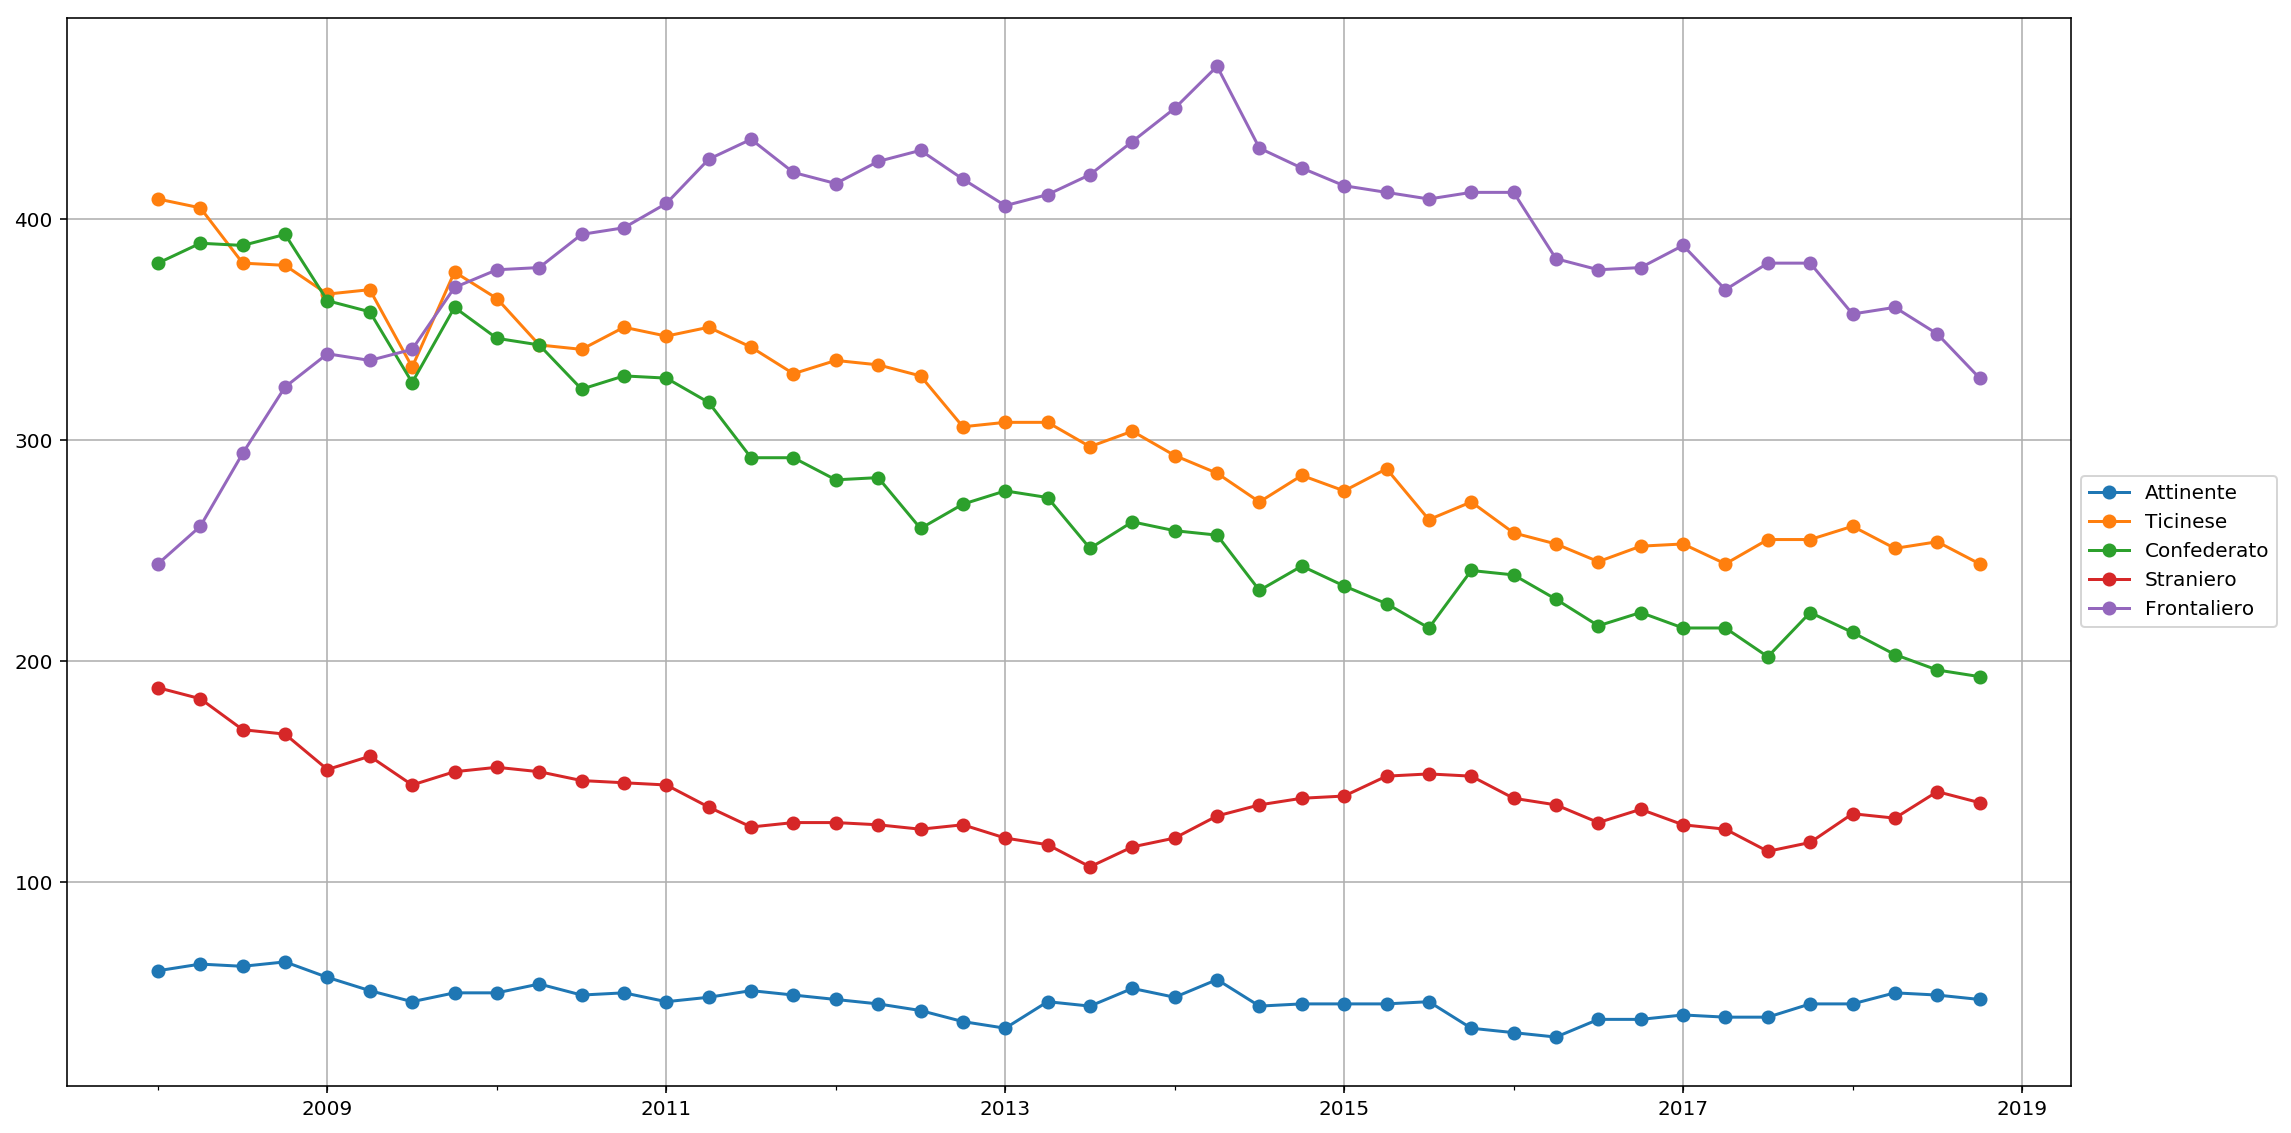

In [27]:
fig, ax1 = plt.subplots(1,1, figsize=(16,8))
types = df.index.get_level_values(0).unique()
for typ in types:
    df.xs(typ)['measure'].plot(ax=ax1, marker='o', label=typ);
    ax1.set_title("")
    ax1.xaxis.set_label_text("");
    ax1.yaxis.set_label_text("");
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.grid()
    plt.tight_layout();

In [35]:
df2 = read_quarterly_data('q_quartieri')
df2.rename({'Quartierenome':'nei'}, axis=1, inplace=True)
df2 = df2.set_index(['nei','yq'])
df2 = df2.groupby(['yq'])[['TotaleAbitantiCurr']].sum()

In [36]:
df = df.reset_index().set_index('yq')
df['total'] = df2['TotaleAbitantiCurr']
df = df.reset_index().set_index(['type','yq'])
df['percentage'] = df['measure']/df['total']*100

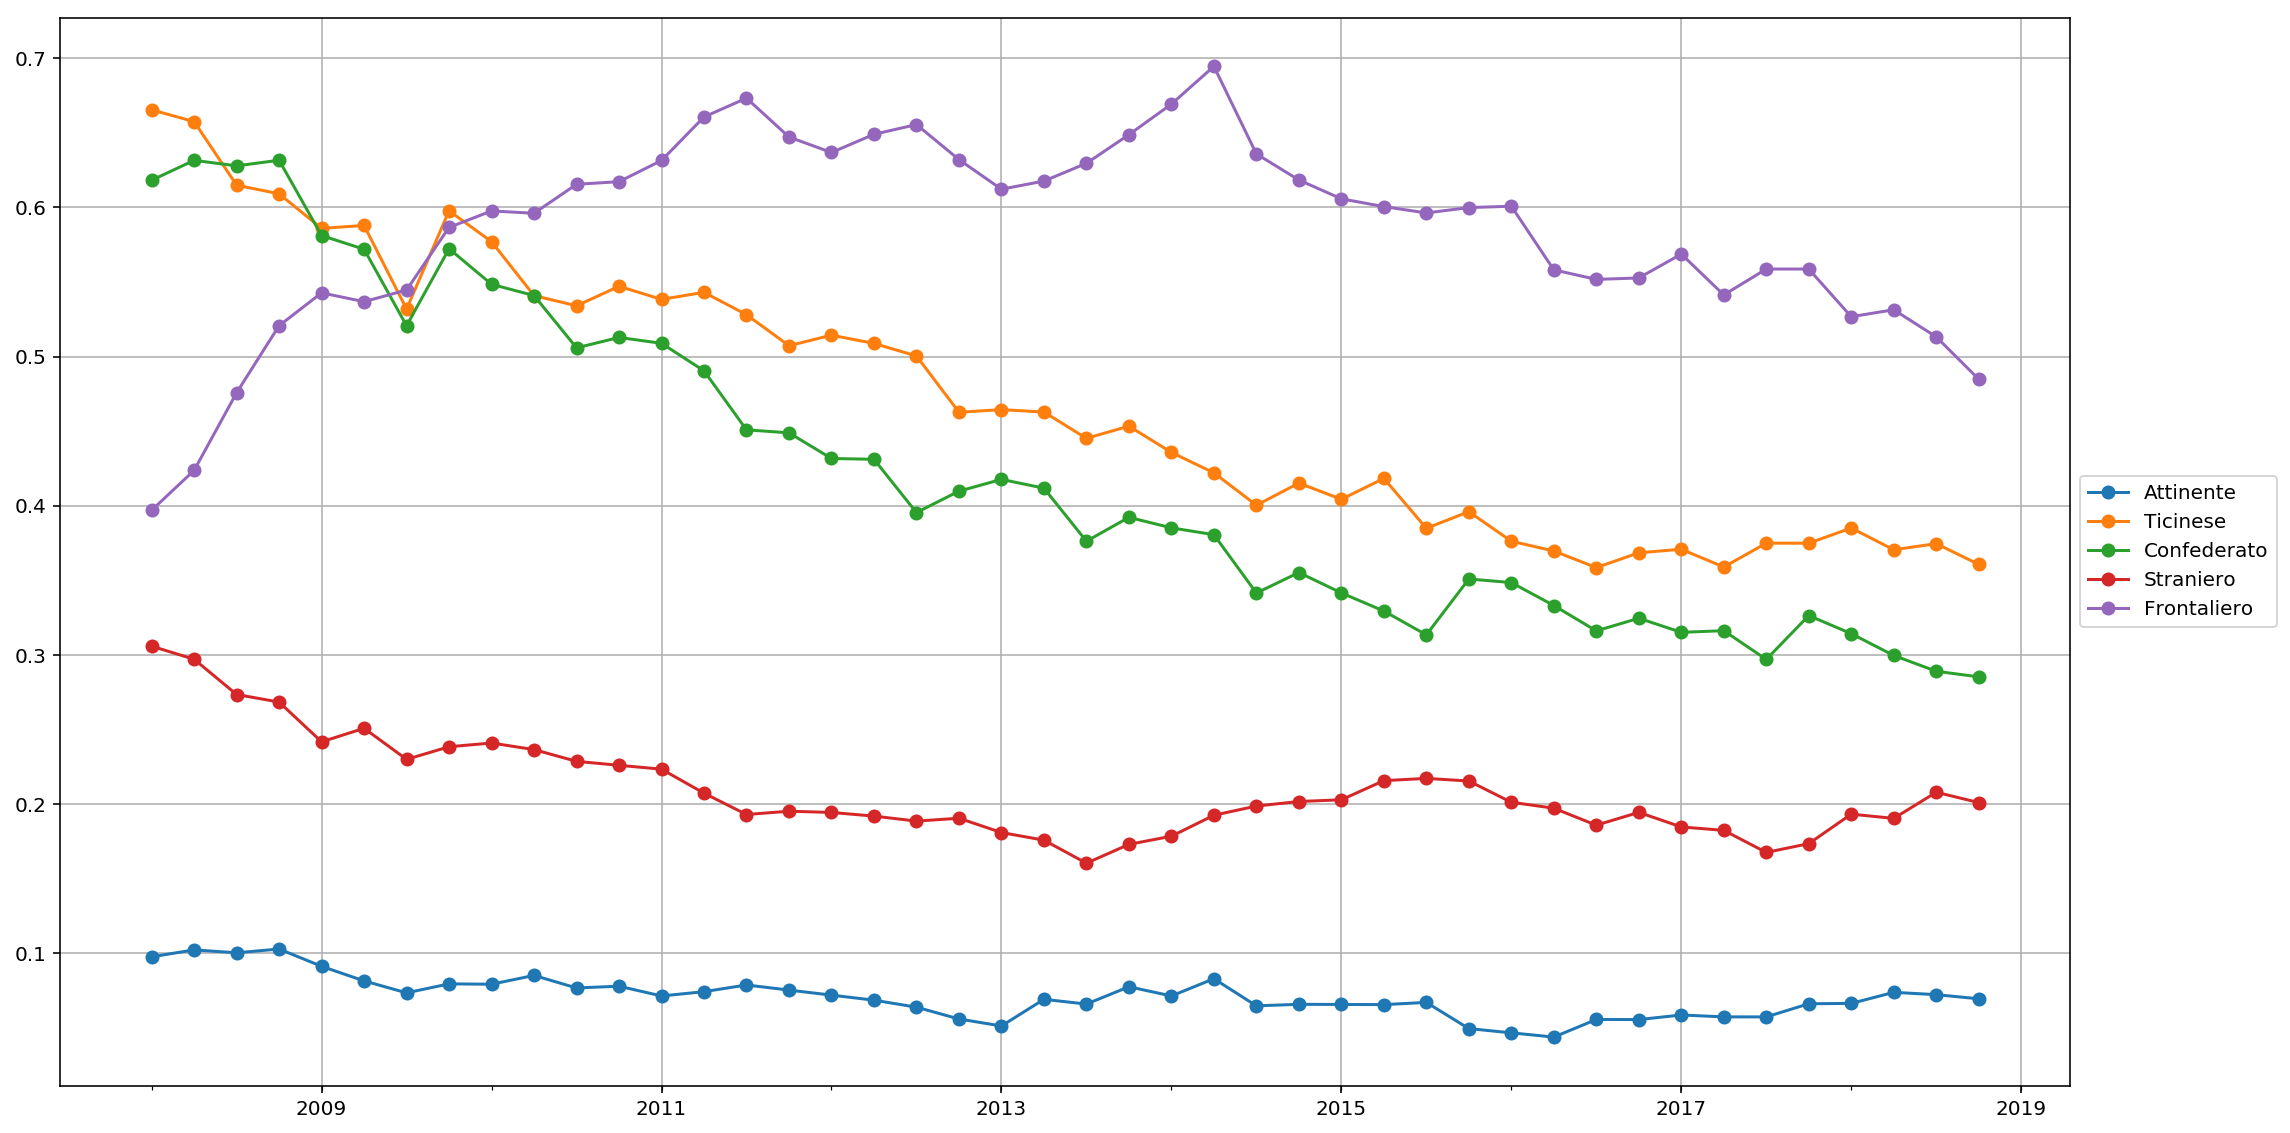

In [37]:
fig, ax1 = plt.subplots(1,1, figsize=(16,8))
types = df.index.get_level_values(0).unique()
for typ in types:
    df.xs(typ)['percentage'].plot(ax=ax1, marker='o', label=typ);
    ax1.set_title("")
    ax1.xaxis.set_label_text("");
    ax1.yaxis.set_label_text("");
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.grid()
    plt.tight_layout();

## Other Datasets

In [12]:
ail = pd.read_csv("/Users/abramo/Desktop/usi_hackathon_data/data/ail/colonnine.csv")
ail.head()

,ChargingStationId,ChargingStationName,Description,Paese,Stazione,X,Y,osservazioni GIS
0,1949,AIL - N2 - 06 - PARCHEGGIO AEROPORTO,Ricarica gratuita,Agno,"AIL - N2 - 06 - PARCHEGGIO AEROPORTO, Agno",NaN,NaN,Non presente in GIS
1,2865,AIL - N2 - 23 - VIA INDUSTRIE,Tariffa di stazionamento (07:00 - 22:00): - du...,Bedano,"AIL - N2 - 23 - VIA INDUSTRIE, Bedano",714540.305,101094.698,NaN
2,1946,AIL - N2 - 03 - STRADA REGINA,Tariffa di stazionamento (07:00 - 22:00): - du...,Bioggio,"AIL - N2 - 03 - STRADA REGINA, Bioggio",713778.841,96855.316,NaN
3,3010,AIL - P1 - 38 - VIA MULINI,Tariffa di stazionamento (07:00 - 22:00): - du...,Bioggio,"AIL - P1 - 38 - VIA MULINI, Bioggio",713928.632,96680.165,NaN
4,2113,AIL - N2 - 15 - VIA MAROGGIA,Tariffa di stazionamento (07:00 - 22:00): - du...,Bissone,"AIL - N2 - 15 - VIA MAROGGIA, Bissone",718452.250,89731.114,NaN


In [6]:
ail2 = pd.read_csv("/Users/abramo/Desktop/usi_hackathon_data/data/ail/dati_ricariche_auto_elettriche_v1.csv")
ail2.head()

,ChargeLogId,UserId,anno,BeginDate,BeginHour,EndDate,EndHour,Duration,Durata ore,PowerConsumption,...,Currency,TransactionType,ChargingStationId,ChargingStationName,Paese,Stazione,Plug,PlugType,UserOperatorName,UserOperatorId
0,150745,Sconosciuto,2017,01.01.17,10:30,01.01.17,10:32,130,00:02,23,...,CHF,Anderer,1946,AIL - N2 - 03 - STRADA REGINA,Bioggio,"AIL - N2 - 03 - STRADA REGINA, Bioggio",Destra,Mode1_T23,NaN,NaN
1,150776,Sconosciuto,2017,01.01.17,14:50,01.01.17,15:51,3681,01:01,16742,...,CHF,Anderer,1874,AIL - N2 - 02 - PIAZZA BROCCHI,Montagnola,"AIL - N2 - 02 - PIAZZA BROCCHI, Montagnola",Sinistra,Mode3_Type2_Plug,NaN,NaN
2,150814,Sconosciuto,2017,01.01.17,19:40,01.01.17,21:34,6784,01:54,20413,...,CHF,Anderer,1946,AIL - N2 - 03 - STRADA REGINA,Bioggio,"AIL - N2 - 03 - STRADA REGINA, Bioggio",Destra,Mode3_Type2_Plug,NaN,NaN
3,150860,Sconosciuto,2017,01.02.17,12:18,01.02.17,13:15,3457,00:57,10154,...,CHF,Anderer,1874,AIL - N2 - 02 - PIAZZA BROCCHI,Montagnola,"AIL - N2 - 02 - PIAZZA BROCCHI, Montagnola",Sinistra,Mode3_Type2_Plug,NaN,NaN
4,150873,Sconosciuto,2017,01.02.17,14:50,01.02.17,14:52,121,00:02,0,...,CHF,Anderer,1946,AIL - N2 - 03 - STRADA REGINA,Bioggio,"AIL - N2 - 03 - STRADA REGINA, Bioggio",Sinistra,Mode1_T23,NaN,NaN


In [7]:
meteo = pd.read_csv("/Users/abramo/Desktop/usi_hackathon_data/data/meteo_suisse/Dati-meteo_Lugano.csv")
meteo.head()

,Data e ora,Temp. [°C],Prec. [mm],Data,Ora
0,01.10.2018 00:00,14.8,0.0,01.10.2018,00:00
1,01.10.2018 00:10,14.6,0.0,01.10.2018,00:10
2,01.10.2018 00:20,15.6,0.0,01.10.2018,00:20
3,01.10.2018 00:30,16.3,0.0,01.10.2018,00:30
4,01.10.2018 00:40,16.2,0.0,01.10.2018,00:40


In [10]:
bikes = pd.read_csv("/Users/abramo/Desktop/usi_hackathon_data/data/publibike/station_number_of_loans.csv")
bikes.head()

,Fahrt: Name,Station - VON
0,2290666,Viganello
1,2298843,Viganello
2,2300216,Viganello
3,2303174,Viganello
4,2304140,Viganello


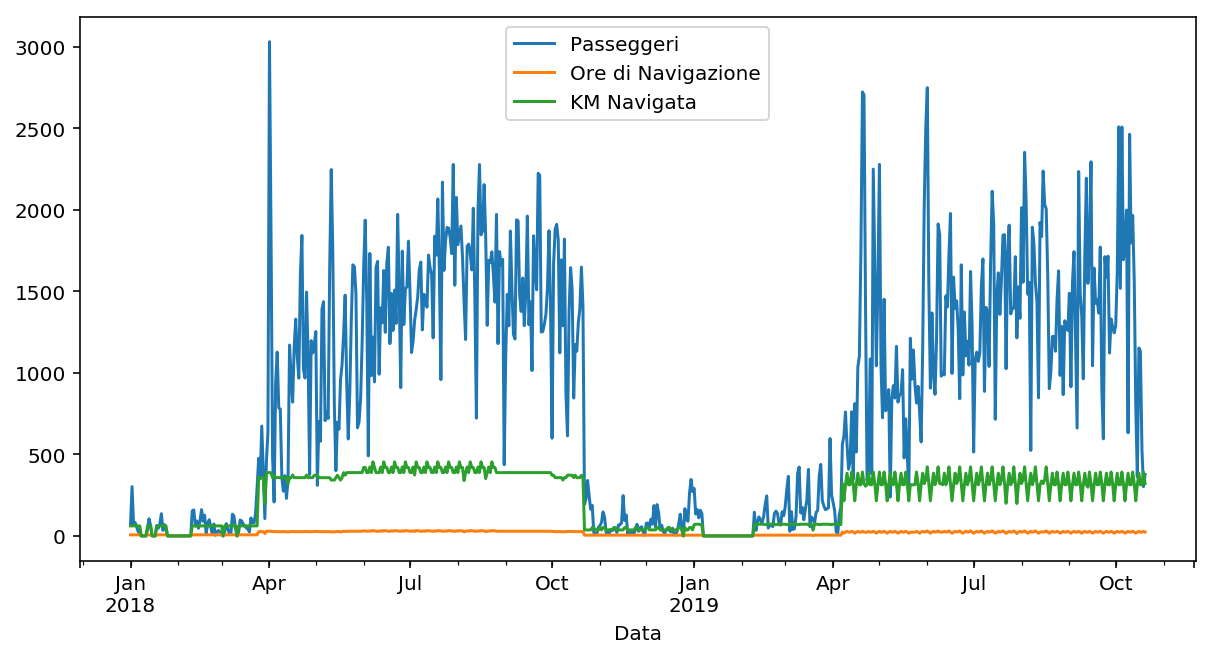

In [17]:
boats = pd.read_csv("/Users/abramo/Desktop/usi_hackathon_data/data/societa_navigazione_lugano/SNL_Data_Passeggeri_Giornaliera.csv", parse_dates=['Data'])
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
boats.set_index('Data').plot(ax=ax1);

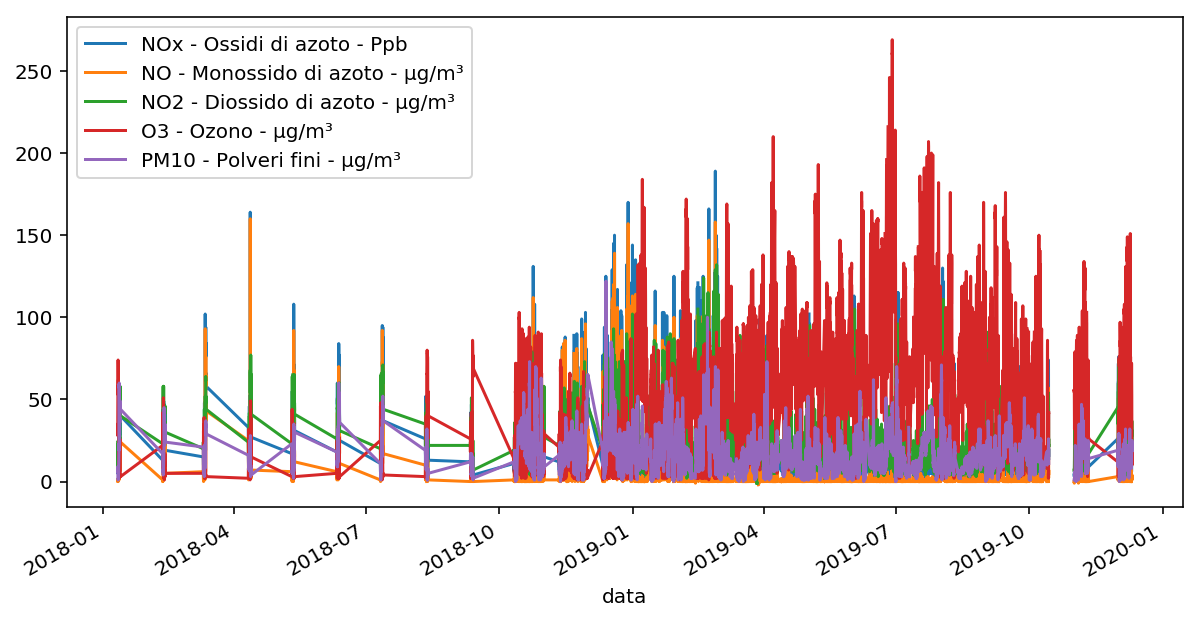

In [22]:
poll = pd.read_csv("/Users/abramo/Desktop/usi_hackathon_data/data/ufam/lugano_air_pollution.csv", sep=';', parse_dates=['data'])
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
poll.set_index('data').plot(ax=ax1);